In [2]:
import os
import sys

from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.join(os.path.dirname(""), os.pardir))
import coherence_analysis.utils as f

In [403]:
sampling_rate = 500  # Hz
duration = 60  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal1 = np.cos(2 * np.pi * 50 * t) + 0.005 * np.random.normal(size=t.shape)
signal2 = np.zeros(t.shape)
impulse_times = [5*i for i in range(12)]
for impulse_time in impulse_times:
    # print(impulse_time)
    index = int(impulse_time * sampling_rate)
    print(index)
    signal2[index+1250] = 1
# signal2[14900] = 1
# signal2[12000] = 1

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500


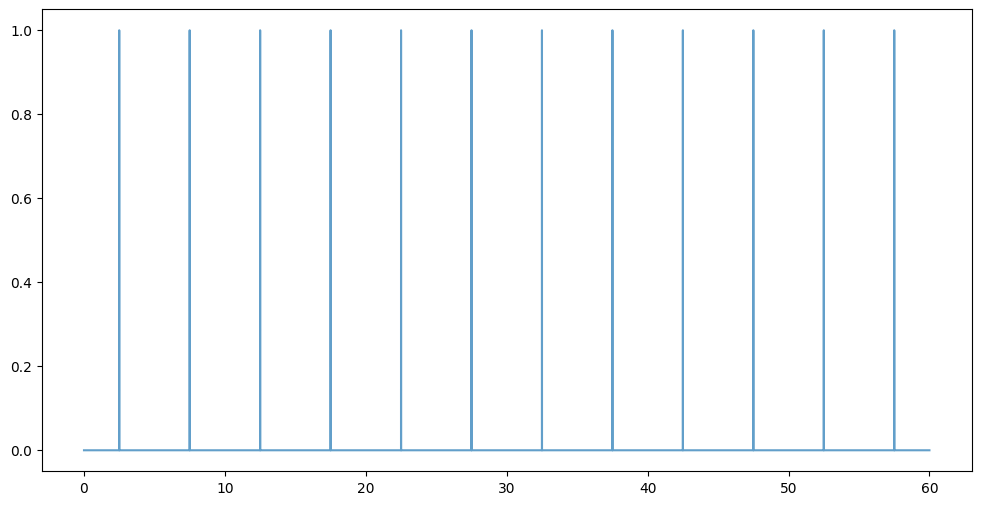

In [404]:
plt.figure(figsize=(12, 6))
# plt.plot(t, signal1, label='Signal 1 (50 Hz cosine wave)')
plt.plot(t, signal2, label='Signal 2 (Impulse train)', alpha=0.7)

Text(0.5, 1.0, 'Signal 1')

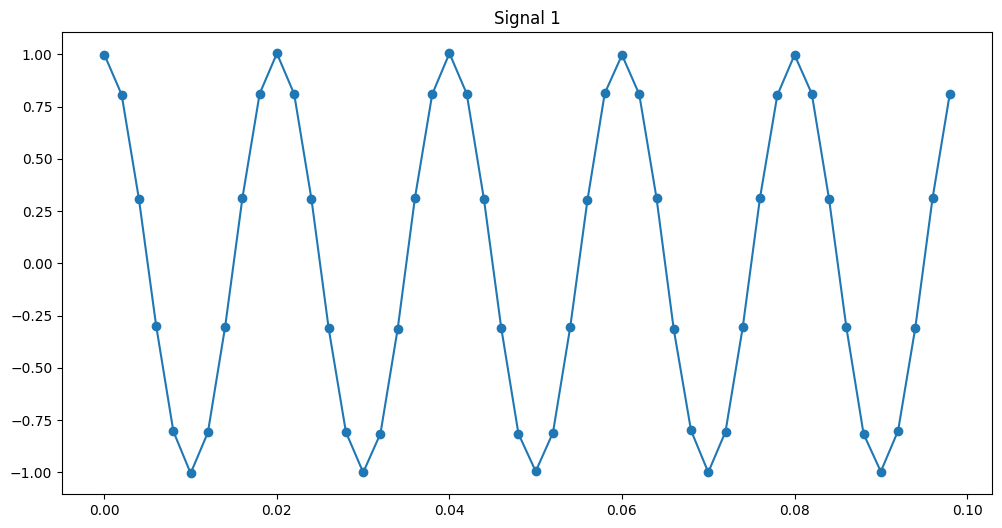

In [405]:
plt.figure(figsize=(12, 6))
plt.plot(t[:50], signal1[:50], "-o")
plt.title("Signal 1")

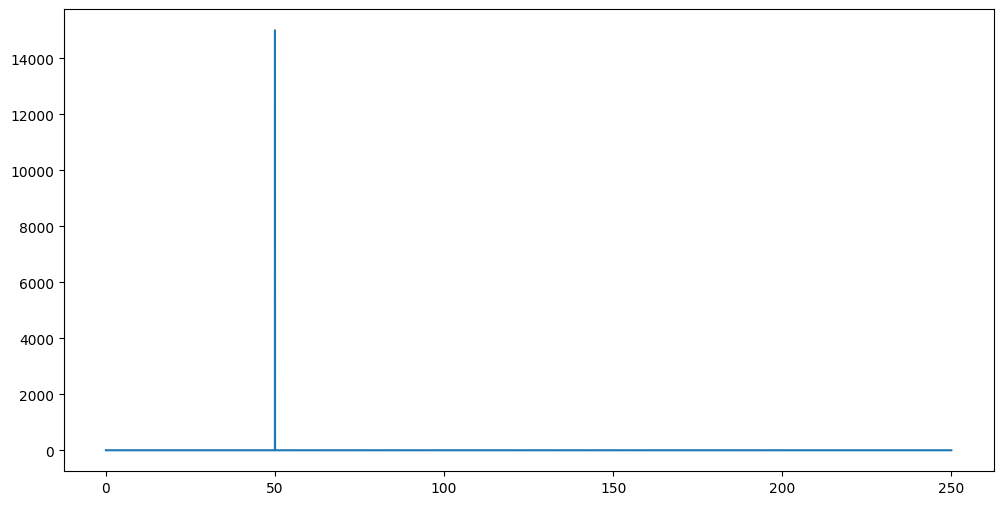

In [406]:
spectra = np.fft.rfft(signal1)
frequencies = np.fft.rfftfreq(len(signal1), d=1/sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(spectra))


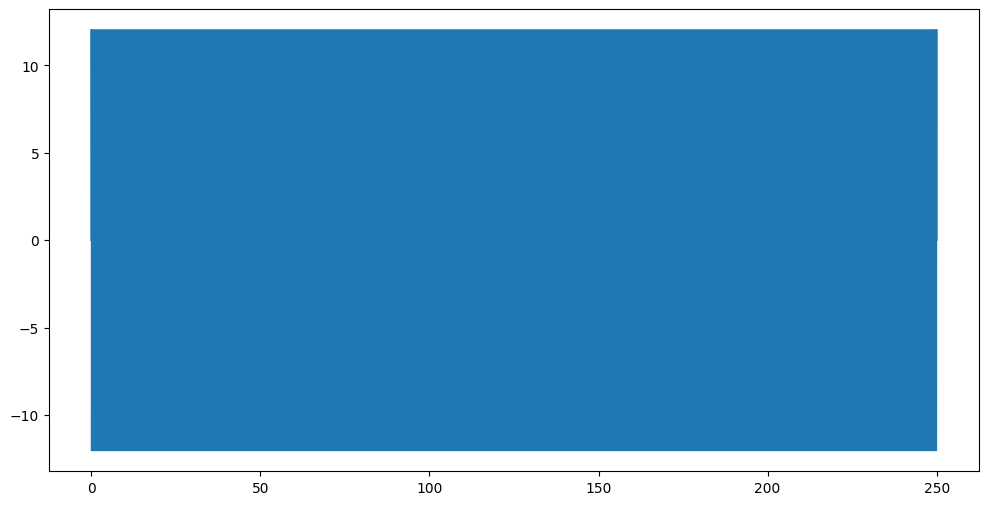

In [407]:
spectra = np.fft.rfft(signal2)
frequencies = np.fft.rfftfreq(len(signal2), d=1/sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectra)

In [408]:
data = np.tile(signal1, (3, 1))
data = np.tile(signal2, (3, 1))
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [409]:
win_spectra, frequencies = f.windowed_spectra(data, 5, 0, sample_interval = 1/sampling_rate)

In [410]:
data.shape

(3, 30000)

In [411]:
win_spectra.shape

(12, 3, 1251)

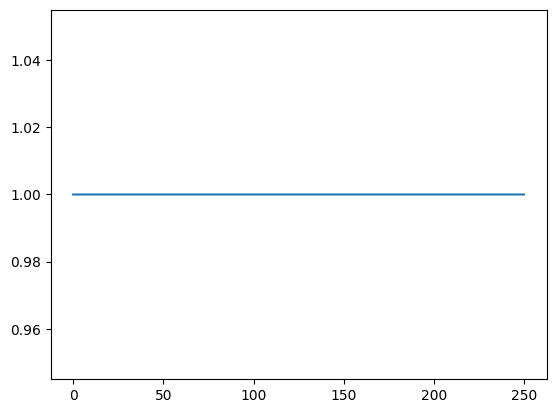

In [419]:
plt.plot(frequencies, np.abs(win_spectra[4, 0, :]))

In [413]:
normalized_spectra, frequencies = f.normalised_windowed_spectra(data, 5, 0, sample_interval = 1/sampling_rate)

In [414]:
normalized_spectra.shape

(1251, 3, 12)

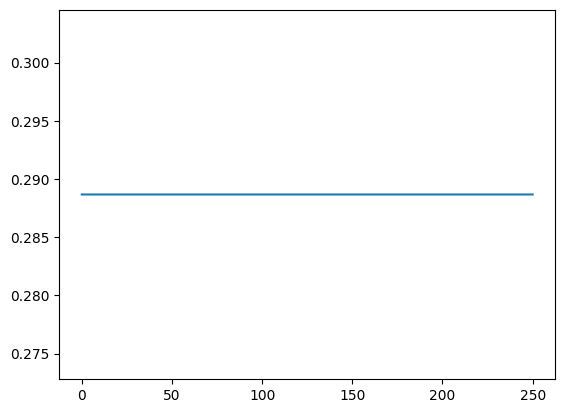

In [417]:
plt.plot(frequencies, np.abs(normalized_spectra[:, 0, 4]))

In [420]:
np.allclose(np.abs(win_spectra), 1)

True

In [422]:
np.allclose(np.abs(normalized_spectra), 1/np.sqrt(12))

True

In [425]:
len(frequencies)

1251

In [426]:
len(np.fft.rfftfreq(2500, d=1/sampling_rate))

1251

In [3]:
tr = np.array(range(60))
tr[::5]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [435]:
select = (tr > 5) & (tr < 55)
tr[select]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])